In [53]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [54]:
df_spy = pd.read_csv(
    "../Data/CleanedData.csv")

In [55]:
df_spy

,Unnamed: 0,Open,High,Low,Close,Volume,CPI,Unemployment Rate,Fed Funds Rate,M2 Money Supply,Close_lag_1,Close_lag_2,Close_lag_3,5_day_ma,20_day_ma,day_diff
0,2000-01-31,86.558580,89.018310,86.040742,88.948601,10768700.0,169.300,4.0,5.45,4667.6,86.598404,89.386726,89.745270,89.028246,90.988057,2.390021
1,2000-02-01,89.068073,90.302917,88.291317,89.824913,8419900.0,170.000,4.1,5.73,4680.9,88.948601,86.598404,89.386726,88.900783,90.844656,0.756840
2,2000-02-02,90.044005,90.661426,89.466416,89.904587,6205900.0,170.000,4.1,5.73,4680.9,89.824913,88.948601,86.598404,88.932646,90.886481,-0.139418
3,2000-02-03,89.785051,91.298730,89.227380,91.258896,7997500.0,170.000,4.1,5.73,4680.9,89.904587,89.824913,88.948601,89.307080,90.988055,1.473845
4,2000-02-04,91.258928,91.776766,90.581756,90.880508,4925400.0,170.000,4.1,5.73,4680.9,91.258896,89.904587,89.824913,90.163501,91.142411,-0.378420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,2025-01-27,594.809998,599.690002,594.640015,599.369995,70361100.0,317.685,4.1,4.48,21533.8,607.969971,609.750000,606.440002,605.315991,593.668503,4.559998
6286,2025-01-28,600.619995,605.369995,597.250000,604.520020,44433300.0,317.685,4.1,4.48,21533.8,599.369995,607.969971,609.750000,605.609998,593.827502,3.900024
6287,2025-01-29,603.719971,604.130005,599.219971,601.809998,37177400.0,317.685,4.1,4.48,21533.8,604.520020,599.369995,607.969971,604.683997,594.167502,-1.909973
6288,2025-01-30,603.960022,606.599976,600.719971,605.039978,39281300.0,317.685,4.1,4.48,21533.8,601.809998,604.520020,599.369995,603.741992,595.008502,1.079956


In [56]:
'''
Inside Up

T-1 Inside
T Breaks T-1 High and Reaches T-2 High
'''

df_spy['inside_day'] = (df_spy['High'].shift(1) > df_spy['High']) & (
    df_spy['Low'].shift(1) < df_spy['Low'])

df_spy['inside_up'] = df_spy['inside_day'].shift(
    1) & (df_spy['High'] > df_spy['High'].shift(1))

df_spy['inside_up_success'] = df_spy['inside_up'] & (
    df_spy['High'] > df_spy['High'].shift(2))

success_rate = df_spy['inside_up_success'].sum(
) / df_spy['inside_up'].sum() * 100 if df_spy['inside_up'].sum() > 0 else 0


print(df_spy[['High', 'Low', 'inside_day',
      'inside_up', 'inside_up_success']].head(10))
print(f"Inside Up Success Rate: {success_rate:.2f}%")

        High        Low  inside_day  inside_up  inside_up_success
0  89.018310  86.040742       False      False              False
1  90.302917  88.291317       False      False              False
2  90.661426  89.466416       False      False              False
3  91.298730  89.227380       False      False              False
4  91.776766  90.581756       False      False              False
5  91.000015  90.143591       False      False              False
6  92.135249  91.537744       False      False              False
7  92.075539  90.034063       False      False              False
8  90.860605  89.785096       False      False              False
9  90.462258  87.972654       False      False              False
Inside Up Success Rate: 73.81%


In [57]:
'''
Inside Down

T-1 Inside
T Breaks T-1 Low and Reaches T-2 Low
'''

df_spy['inside_down'] = df_spy['inside_day'].shift(
    1) & (df_spy['Low'] < df_spy['Low'].shift(1))

df_spy['inside_down_success'] = df_spy['inside_down'] & (
    df_spy['Low'] < df_spy['Low'].shift(2))

inside_down_success_rate = df_spy['inside_down_success'].sum(
) / df_spy['inside_down'].sum() * 100 if df_spy['inside_down'].sum() > 0 else 0

print(df_spy[['High', 'Low', 'inside_day', 'inside_up',
      'inside_up_success', 'inside_down', 'inside_down_success']].head(10))
print(f"Inside Down Success Rate: {inside_down_success_rate:.2f}%")

        High        Low  inside_day  inside_up  inside_up_success  \
0  89.018310  86.040742       False      False              False   
1  90.302917  88.291317       False      False              False   
2  90.661426  89.466416       False      False              False   
3  91.298730  89.227380       False      False              False   
4  91.776766  90.581756       False      False              False   
5  91.000015  90.143591       False      False              False   
6  92.135249  91.537744       False      False              False   
7  92.075539  90.034063       False      False              False   
8  90.860605  89.785096       False      False              False   
9  90.462258  87.972654       False      False              False   

   inside_down  inside_down_success  
0        False                False  
1        False                False  
2        False                False  
3        False                False  
4        False                False  
5        Fal

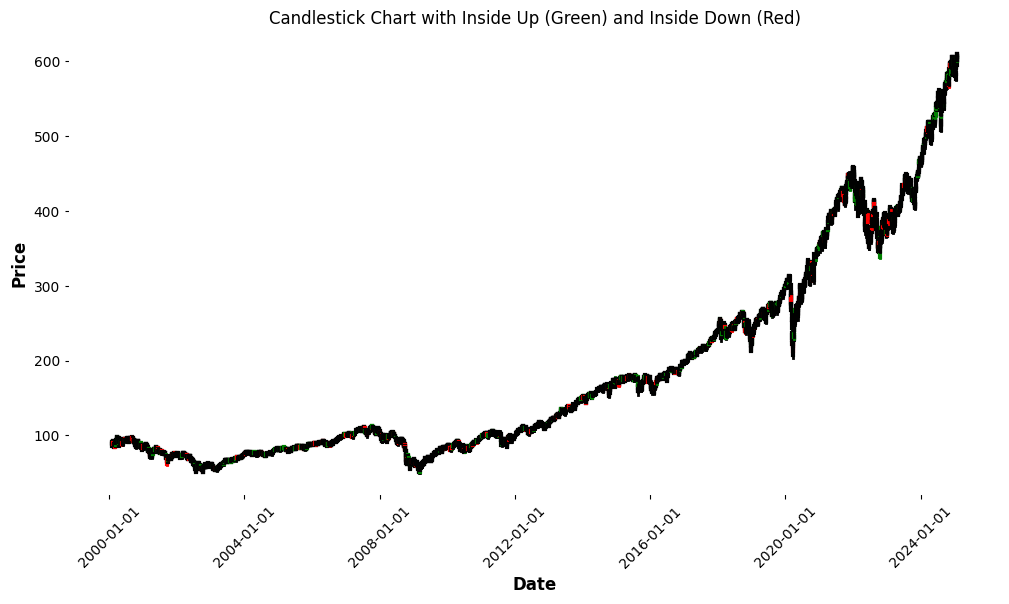

In [58]:
df_spy['Date'] = pd.to_datetime(df_spy['Unnamed: 0'])
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(df_spy)):
    color = 'g' if df_spy.iloc[i]['inside_up'] else 'r' if df_spy.iloc[i]['inside_down'] else 'black'
    ax.plot([df_spy.iloc[i]['Date'], df_spy.iloc[i]['Date']], [
            df_spy.iloc[i]['Low'], df_spy.iloc[i]['High']], color=color)
    ax.plot([df_spy.iloc[i]['Date'], df_spy.iloc[i]['Date']], [df_spy.iloc[i]['Open'],
            df_spy.iloc[i]['Close']], color=color, linewidth=3)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Candlestick Chart with Inside Up (Green) and Inside Down (Red)')
plt.grid()
plt.show()